<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Interactive Distribution Transformations in Python 


#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Feature Engineering with Distribution Transformations

Here are 2 interactive workflows demonstrationing distribution transformations, a common, essential tool for feature engineering for predictive machine learning.

I have recorded a walk-through of this interactive dashboard in my [Data Science Interactive Python Demonstrations](https://www.youtube.com/playlist?list=PLG19vXLQHvSDy26fM3hDLg3VCU7U5BGZl) series on my [YouTube](https://www.youtube.com/@GeostatsGuyLectures) channel.

* Join me for walk-through of this dashboard [04 Data Science Interactive: Distribution Transformations](TBD). I'm stoked to guide you and share observations and things to try out!   

* I have a lecture on [Distribution Transformation](https://www.youtube.com/watch?v=ZDIpE3OkAIU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=14) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) course. Note, for all my recorded lecture the interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

* Also, I have a lecture on [Feature Transformations for Machine Learning](https://www.youtube.com/watch?v=6QJjZoWknEI&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=9) as part of my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course.

* Finally, I have a lecture on [Q-Q plots](https://www.youtube.com/watch?v=RETZus4XBNM&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=23)  as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) course.

#### Distribution Transformations Motivation

With distribution transformation we map our feature to a new feature with a new distribution, e.g., we could transform our sample data to be Gaussian distributed. 

Why do we do this? Here are some reasons for distribution transformation in data science:

* **Inference**: the feature distribution has expected shape from theory, so we are adding important information

* **Data Preparation / Cleaning**: correcting for too data paucity, data noise and data outliers

* **Theory**: a specific distribution assumption is required for a method, so we correct the data to have this distribution to to avoid invalidating an assumption

#### Distribution Transformations

How do we do it? We apply the following to all sample data, $x_{\alpha}$ $\forall$ $\alpha = 1,\ldots,n$.

\begin{equation}
y_{\alpha} = G^{-1}_Y\left(F_X(x_{\alpha})\right)
\end{equation}

were $X$ is the original feature with a $F_X$ original cumulative distribution function and $Y$ is transformed feature with a $G_Y$ transformed cumulative distribution function.

Let's summarize this operation:

* Mapping from one distribution to another through percentiles

* This may be applied to any parametric or nonparametric distributions

* This is a rank preserving transform, e.g. P50 of 𝑋 is P50 of 𝑌

#### Distribution Transformation Dashboards

To demonstrate distributions, I built out 2 dashboards:

1. data to a nonparametric distribution (to match the distribution of another dataset)
2. data to a parametric distribution (to a Gaussian distribution)

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 

That's all!

#### Load the Required Libraries

We will also need some standard Python packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import random                             # randon numbers
from scipy.stats import norm              # Gaussian parametric distribution
import geostatspy.GSLIB as GSLIB
from ipywidgets import interactive        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import warnings
warnings.filterwarnings('ignore')         # supress warnings

#### Set the Random Number Seed

Set the random number seed so that we have a repeatable workflow

In [2]:
seed = 73073

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  For fun try misspelling the name. You will get an ugly, long error.  

In [4]:
data_url = "https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data.csv"
df = pd.read_csv(data_url)     # load our data table

It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [5]:
df.head(n=6)                           # we could also use this command for a table preview

,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
5,100.0,400.0,0.0,0.110579,3.691908,5295.267191


#### Calculating and Plotting a CDF by Hand

Let's demonstrate the calculation and plotting of a non-parametric CDF by hand

1. make a copy of the feature as a 1D array (ndarray from NumPy)
2. sort the data in ascending order
3. assign cumulative probabilities based on the tails assumptions
4. plot cumulative probability vs. value

The ndarray has a shape of (261,).


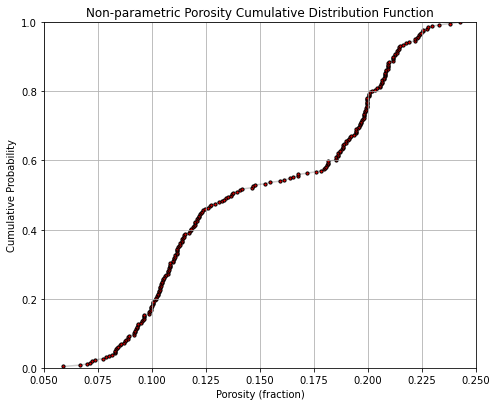

In [6]:
por = df['Porosity'].copy(deep = True).values # make a deepcopy of the feature from the DataFrame
print('The ndarray has a shape of ' + str(por.shape) + '.')

por = np.sort(por)                           # sort the data in ascending order
n = por.shape[0]                             # get the number of data samples

cprob = np.zeros(n)
for i in range(0,n):
    index = i + 1
    cprob[i] = index / n                     # known upper tail
    # cprob[i] = (index - 1)/n               # known lower tail
    # cprob[i] = (index - 1)/(n - 1)         # known upper and lower tails
    # cprob[i] = index/(n+1)                 # unknown tails  

plt.subplot(111)
plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Porosity Cumulative Distribution Function")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.1, hspace=0.2)
plt.show()

#### Distribution Transformation to a Parametric Distribution

We can transform our data feature distribution to any parametric distribution with this workflow.

1. Calculate the cumulative probability value of each of our data values, $p_{\alpha} = F_x(x_\alpha)$, $\forall$ $\alpha = 1,\ldots, n$.

2. Apply the inverse of the target parametric cumulative distribution function (CDF) to calculate the transformed values. $y_{\alpha} = G_y^{-1}\left(F_x(x_\alpha)\right)$, $\forall$ $\alpha = 1,\ldots, n$.

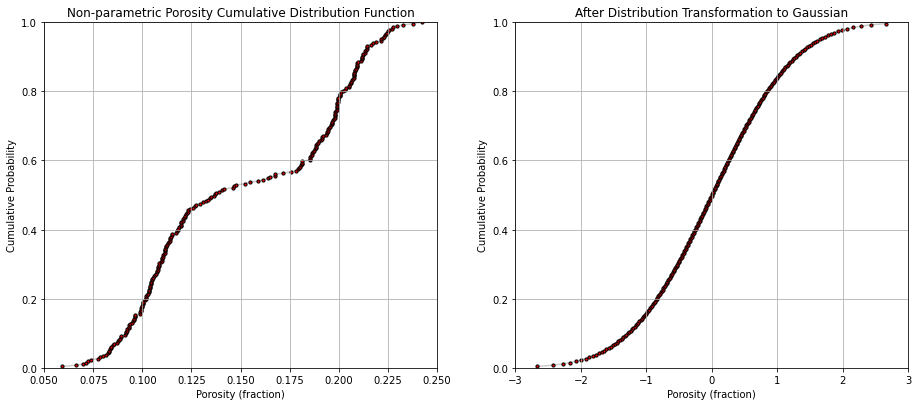

In [7]:
y = np.zeros(n)

for i in range(0,n):
    y[i] = norm.ppf(cprob[i],loc=0.0,scale=1.0)

plt.subplot(121)
plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Porosity Cumulative Distribution Function")

plt.subplot(122)
plt.plot(y,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(y,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([-3.0,3.0]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("After Distribution Transformation to Gaussian")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Let's make an interactive version of this plot to visualize the transformation.

In [10]:
# widgets and dashboard
l = widgets.Text(value='                                                  Data Analytics, Distribution Transformation, Prof. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

data_index = widgets.IntSlider(min=1, max = n-1, value=1.0, step = 10.0, description = 'data index',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.VBox([l,data_index],)

def run_plot(data_index):                       # make data, fit models and plot
    plt.subplot(131)
    plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.scatter(por,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
    plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
    plt.xlabel("Original Feature, $x$"); plt.ylabel("Cumulative Probability"); plt.title("Original Cumulative Distribution Function")
    plt.plot([por[data_index-1],por[data_index-1]],[0.0,cprob[data_index-1]],color = 'red',linestyle='dashed')
    plt.plot([por[data_index-1],3.0],[cprob[data_index-1],cprob[data_index-1]],color = 'red',linestyle='dashed')
    plt.annotate('x = ' + str(round(por[data_index-1],2)), xy=(por[data_index-1]+0.003, 0.01))
    plt.annotate('p = ' + str(round(cprob[data_index-1],2)), xy=(0.225, cprob[data_index-1]+0.02))

    
    plt.subplot(132)
    plt.plot(y,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.scatter(y,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
    plt.grid(); plt.xlim([-3.0,3.0]); plt.ylim([0.0,1.0])
    plt.xlabel("Gaussian Transformed Feature, $y$"); plt.ylabel("Cumulative Probability"); plt.title("After Distribution Transformation to Gaussian")
    plt.plot([-3.0,y[data_index-1]],[cprob[data_index-1],cprob[data_index-1]],color = 'red',linestyle='dashed')
    plt.plot([y[data_index-1],y[data_index-1]],[0.0,cprob[data_index-1]],color = 'red',linestyle='dashed')
    #plt.arrow(y[data_index-1],cprob[data_index-1],0.0,-1.0*(cprob[data_index-1]-0.01),color = 'red',width = 0.02, head_width = 0.1, linestyle='dashed', head_length = 0.01)
    plt.annotate('p = ' + str(round(cprob[data_index-1],2)), xy=(-2.90, cprob[data_index-1]+0.02)) 
    plt.annotate('y = ' + str(round(y[data_index-1],2)), xy=(y[data_index-1]+0.1, 0.01))
    
    plt.subplot(133)
    plt.plot(por,y, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([-3.0,3.0])
    plt.xlabel("Original Porosity (fraction)"); plt.ylabel("Gaussian Transformed Porosity (N[fraction])"); plt.title("Parametric Distribution Transformation, Q-Q Plot")
    #plt.plot([0.05,0.25],[0.05,0.25],color = 'red',linestyle='dashed', alpha = 0.4)
    plt.scatter(por[data_index-1],y[data_index-1],s = 50, c = 'red', edgecolor = 'black', alpha = 1.0, zorder=200) # plot the CDF points
    plt.scatter(por,y,s = 20, c = 'red', edgecolor = 'black', alpha = 0.1, zorder=100) # plot the CDF points
   
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
    plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'data_index':data_index})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Data Analytics Distribution Transformation Demonstration 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Select any data value and observe the distribution transform by mapping through cumulative probability.

### The Inputs

* **data_index** - the data index from 1 to n in the sorted ascending order

In [11]:
display(ui, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 3 Axes>', 'i…

#### Distribution Transform to a Non-Parametric Distribution

We can apply the mapping through cumulative probabilities to transform from any distribution to any other distribution.

* let's make a new data set by randomly sampling from the previous one and adding error

Then we can demonstrate transforming this dataset to match the original distribution

* this is mimicking the situation where we transform a dataset to match the distribution of a better sampled analog distribution


The sample ndarray has a shape of (30,).


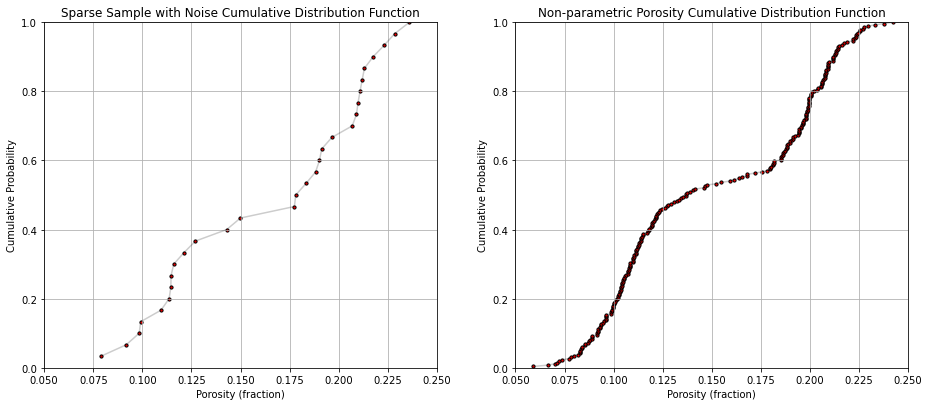

In [12]:
n_sample = 30
df_sample = df.sample(n_sample,random_state = seed)
                      
df_sample = df_sample.copy(deep = True) # make a deepcopy of the feature from the DataFrame

df_sample['Porosity'] = df_sample['Porosity'].values + np.random.normal(loc = 0.0, scale = 0.01, size = n_sample)

df_sample = df_sample.sort_values(by = 'Porosity')                # sort the DataFrame
por_sample = df_sample['Porosity'].values
print('The sample ndarray has a shape of ' + str(por_sample.shape) + '.')

cprob_sample = np.zeros(n_sample)
for i in range(0,n_sample):
    index = i + 1
    cprob_sample[i] = index / n_sample       # known upper tail
    # cprob[i] = (index - 1)/n               # known lower tail
    # cprob[i] = (index - 1)/(n - 1)         # known upper and lower tails
    # cprob[i] = index/(n+1)                 # unknown tails  

plt.subplot(121)
plt.plot(por_sample,cprob_sample, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por_sample,cprob_sample,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Sparse Sample with Noise Cumulative Distribution Function")

plt.subplot(122)
plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Porosity Cumulative Distribution Function")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Let's transform the values and show them on the target distribution.

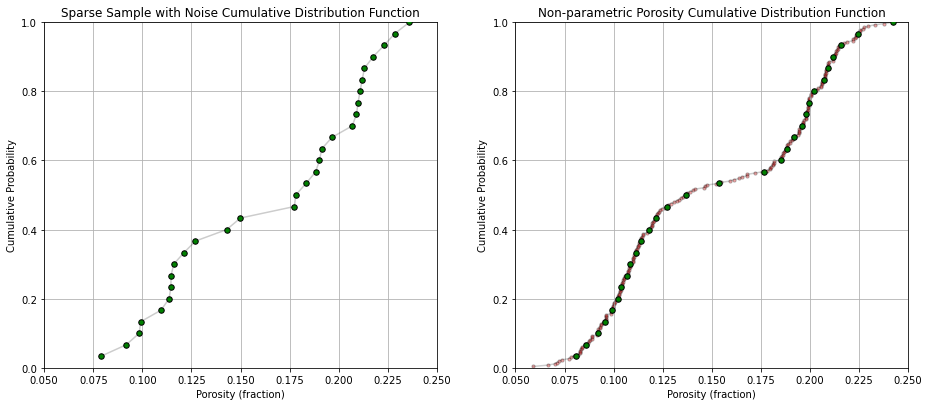

In [13]:
y_sample = np.zeros(n_sample)

for i in range(0,n_sample):
    y_sample[i] = np.percentile(por,cprob_sample[i]*100, interpolation = 'linear') # piecewise linear interpolation of inverse of target CDF 
    
plt.subplot(121)
plt.plot(por_sample,cprob_sample, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por_sample,cprob_sample,s = 30, alpha = 1.0, c = 'green', edgecolor = 'black', zorder = 100) # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Sparse Sample with Noise Cumulative Distribution Function")

plt.subplot(122)
plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 10, c = 'red', edgecolor = 'black', alpha = 0.3) # plot the CDF points
plt.scatter(y_sample,cprob_sample,s = 30, c = 'green', edgecolor = 'black', alpha = 1.0, zorder = 100) # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Porosity Cumulative Distribution Function")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Let's make an interactive version of this plot to visualize the transformation.

In [16]:
# widgets and dashboard
l_sample = widgets.Text(value='                                                  Data Analytics, Distribution Transformation, Prof. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

data_index_sample = widgets.IntSlider(min=1, max = n_sample, value=1.0, step = 1.0, description = 'data sample index',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui_sample = widgets.VBox([l_sample,data_index_sample],)

def run_plot_sample(data_index_sample):                       # make data, fit models and plot
    plt.subplot(131)
    plt.plot(por_sample,cprob_sample, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.scatter(por_sample,cprob_sample,s = 30, alpha = 1.0, c = 'green', edgecolor = 'black',zorder = 100) # plot the CDF points
    plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
    plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Original Sparse Sample with Noise, Cumulative Distribution Function")
    plt.plot([por_sample[data_index_sample-1],por_sample[data_index_sample-1]],[0.0,cprob_sample[data_index_sample-1]],color = 'red',linestyle='dashed')
    plt.plot([por_sample[data_index_sample-1],3.0],[cprob_sample[data_index_sample-1],cprob_sample[data_index_sample-1]],color = 'red',linestyle='dashed')
    plt.annotate('x = ' + str(round(por_sample[data_index_sample-1],2)), xy=(por_sample[data_index_sample-1]+0.003, 0.01))
    plt.annotate('p = ' + str(round(cprob_sample[data_index_sample-1],2)), xy=(0.225, cprob_sample[data_index_sample-1]+0.02))
    
    plt.subplot(132)
    plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.scatter(por,cprob,s = 10, c = 'red', edgecolor = 'black', alpha = 1.0) # plot the CDF points
    plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
    plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Target Porosity Cumulative Distribution Function")
    plt.plot([0.0,y_sample[data_index_sample-1]],[cprob_sample[data_index_sample-1],cprob_sample[data_index_sample-1]],color = 'red',linestyle='dashed')
    plt.plot([y_sample[data_index_sample-1],y_sample[data_index_sample-1]],[0.0,cprob_sample[data_index_sample-1]],color = 'red',linestyle='dashed')
    plt.annotate('p = ' + str(round(cprob_sample[data_index_sample-1],2)), xy=(0.053, cprob_sample[data_index_sample-1]+0.02)) 
    plt.annotate('y = ' + str(round(y_sample[data_index_sample-1],2)), xy=(y_sample[data_index_sample-1]+0.003, 0.01))
    plt.scatter(y_sample[data_index_sample-1],cprob_sample[data_index_sample-1],s = 50, c = 'green', edgecolor = 'black', alpha = 1.0, zorder=100) # plot the CDF points
    
    plt.subplot(133)
    plt.plot(por_sample,y_sample, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
    plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.05,0.25])
    plt.xlabel("Original Porosity (fraction)"); plt.ylabel("Transformed Porosity (fraction)"); plt.title("Non-parametric Distribution Transformation, Q-Q Plot")
    plt.plot([0.05,0.25],[0.05,0.25],color = 'red',linestyle='dashed', alpha = 0.4)
    plt.scatter(por_sample[data_index_sample-1],y_sample[data_index_sample-1],s = 50, c = 'green', edgecolor = 'black', alpha = 1.0, zorder=200) # plot the CDF points
    plt.scatter(por_sample,y_sample,s = 20, c = 'green', edgecolor = 'black', alpha = 0.3, zorder=100) # plot the CDF points
        
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
    plt.show()
    
    
    
# connect the function to make the samples and plot to the widgets    
interactive_plot_s = widgets.interactive_output(run_plot_sample, {'data_index_sample':data_index_sample})
#interactive_plot_sample.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Data Analytics Distribution Transformation Demonstration 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Select any data value and observe the distribution transform by mapping through cumulative probability.

#### The Inputs

* **data_index** - the data index from 1 to n in the sorted ascending order

In [17]:
display(ui_sample, interactive_plot_s)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 3 Axes>', 'i…

To summarize let's look at a DataFrame with the original noisey sample and the transformed to match the original distribution.

* we're making and showing a table of original values, $x_{\beta}$ $\forall$ $\beta = 1, \ldots, n_{sample}$, and the transformed values, $y_{\beta}$ $\forall$ $\beta = 1, \ldots, n_{sample}$.



In [18]:
df_sample['Transformed_Por'] = y_sample
df_sample.head(n=n_sample)

,X,Y,Facies,Porosity,Perm,AI,Transformed_Por
80,900.0,100.0,0.0,0.078834,1.280257,4573.656072,0.081044
207,201.0,426.0,0.0,0.091786,0.400658,5263.542112,0.085867
47,600.0,700.0,0.0,0.098382,12.384496,3595.586977,0.091834
189,201.0,456.0,0.0,0.099117,0.546396,5018.355476,0.095628
210,231.0,426.0,0.0,0.109470,5.584040,4919.074871,0.099378
5,100.0,400.0,0.0,0.113615,3.691908,5295.267191,0.101987
3,100.0,600.0,0.0,0.114500,2.446678,5201.637996,0.103970
226,211.0,396.0,0.0,0.114596,6.368529,5725.334803,0.106704
41,500.0,400.0,0.0,0.115970,6.312198,5515.918646,0.108460
218,251.0,416.0,0.0,0.121191,1.003374,5822.467914,0.111491


It would be straitforward to modify the code above to perform distribution transformations:

* to a parametric distribution like Gaussian

* to a non-parametric distribution from actual data (build a CDF and interpolate between the data samples)

#### Comments

This was a basic demonstration of distribution transformations. 

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
